In [2]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Time elapsed for \"{func.__name__}\": {end - start:.3e}s")
        return result
    return wrapper

## Solution 1

In [18]:
@timer
def p1(arr):
    return [max(a, key=lambda x: sum(map(int, list(str(x))))) for a in arr]

@timer
def better_p1(arr):
    def sum_digits(x):
        return sum(map(int, list(str(x))))
    return [max(a, key=sum_digits) for a in arr]

example = [
    [1523, 7257, 27118, 1113001, 986, 54],
    [825, 57114, 189084, 97490, 4638, 2567],
    [8793, 246, 1461, 8628, 11464, 19867],
    [790071, 780086, 522, 7528, 97653, 2456],
    [4628, 8970, 2451, 16489, 1451, 791145]
]

print(p1(example))
print(better_p1(example))

Time elapsed for "p1": 1.035e-04s
[986, 189084, 19867, 97653, 16489]
Time elapsed for "better_p1": 9.298e-05s
[986, 189084, 19867, 97653, 16489]


## Solution 2

In [24]:
from pprint import pprint

@timer
def p2(arr):
    return [[1 if i==n else 0 for i in range(max(arr)+1)] for n in arr if n >= 0]

@timer
def better_p2(arr):
    encoding_size = max(arr)
    result = []
    for a in arr:
        if a >= 0:
            result.append([1 if i==a else 0 for i in range(encoding_size+1)])
    
    return result

example = [5,1,0,-3,1,0,-2,4]

pprint(p2(example))
print()
pprint(better_p2(example))

Time elapsed for "p2": 2.599e-05s
[[0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0]]

Time elapsed for "better_p2": 1.907e-05s
[[0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0]]


## Solution 3

In [27]:
@timer
def p3(sample, data):
    last_name_set = set([name[0] for name in data])
    first_name_set = set([name[1:] for name in data])
    return [candidate[0] in last_name_set and candidate[1:] in first_name_set for candidate in sample]

sample = ["한윤호", "김유정", "배혁준", "오재연", "정승훈", "김선웅", "비행기"]
data = ["한재연", "이혁준", "김선웅", "배윤호", "연유정"]

print(p3(sample, data))

Time elapsed for "p3": 2.193e-05s
[True, True, True, False, False, True, False]


## Solution 4

In [3]:
@timer
def p4(sample, data):
    bow = {token: i for i, token in enumerate(sorted(set(' '.join(data).lower().split())))}
    return [[bow.get(token, len(bow)) for token in text.lower().split()] for text in sample]


@timer
def better_p4(sample, data):
    tokens = ' '.join(data).lower().split()
    tokens = set(tokens)
    bow = {token: i for i, token in enumerate(sorted(tokens))}
    
    result = []
    for text in sample:
        encoded = [bow.get(token, len(bow)) for token in text.lower().split()]
        result.append(encoded)
    
    return result


sample = ["Hello my favorite food is pizza", "Yosemite is the best park ever"]
data = ["Hello my name is Park", "my favorite park is Yosemite"] 

print(p4(sample, data))
print(better_p4(sample, data))

Time elapsed for "p4": 2.694e-05s
[[1, 3, 0, 7, 2, 7], [6, 2, 7, 7, 5, 7]]
Time elapsed for "better_p4": 1.955e-05s
[[1, 3, 0, 7, 2, 7], [6, 2, 7, 7, 5, 7]]


## Solution 5

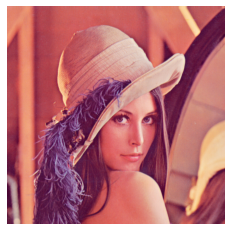

In [19]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

lena = mpimg.imread("lena.jpg")
plt.imshow(lena)
plt.axis("off")
plt.show()

In [20]:
lena.shape

(512, 512, 3)

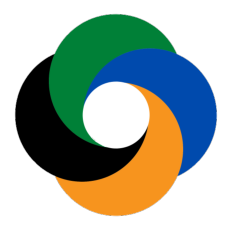

In [30]:
circle = mpimg.imread("circle.jpg")
plt.imshow(circle)
plt.axis("off")
plt.show()

In [31]:
circle.shape

(500, 500, 4)

(512, 512, 4)


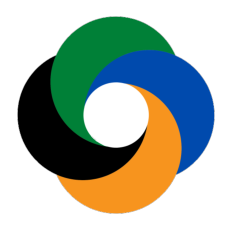

In [32]:
circle = np.pad(circle, ((6,6),(6,6), (0,0)), mode="constant", constant_values=0)
print(circle.shape)
plt.imshow(circle)
plt.axis("off")
plt.show()

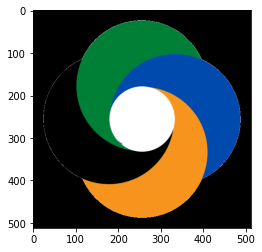

In [46]:
plt.imshow(circle[..., :3])

In [45]:
circle2 = mpimg.imread("circle2.jpg")
circle2.shape

(475, 475, 4)